In [7]:
import pandas as pd

In [8]:
a=pd.read_csv("Sales_Data.csv")
a.head()

,Month,Sales_Qty
0,01-01-2014,3002666
1,01-02-2014,4401553
2,01-03-2014,3205279
3,01-04-2014,4245349
4,01-05-2014,3001940


In [9]:
a.tail()

,Month,Sales_Qty
43,01-08-2017,3621034
44,01-09-2017,5162201
45,01-10-2017,4627177
46,01-11-2017,4623945
47,01-12-2017,4599368


In [10]:
date_rng            =  pd.date_range(start='1/1/2014', end='31/12/2017', freq='MS')
a['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])

In [11]:
a.head()

,Month,Sales_Qty,TimeIndex
0,01-01-2014,3002666,2014-01-01
1,01-02-2014,4401553,2014-02-01
2,01-03-2014,3205279,2014-03-01
3,01-04-2014,4245349,2014-04-01
4,01-05-2014,3001940,2014-05-01


In [12]:
a.tail(20)

,Month,Sales_Qty,TimeIndex
28,01-05-2016,4557363,2016-05-01
29,01-06-2016,3816956,2016-06-01
30,01-07-2016,4410887,2016-07-01
31,01-08-2016,3694713,2016-08-01
32,01-09-2016,3822669,2016-09-01
33,01-10-2016,3689286,2016-10-01
34,01-11-2016,3728654,2016-11-01
35,01-12-2016,4732677,2016-12-01
36,01-01-2017,3216483,2017-01-01
37,01-02-2017,3453239,2017-02-01


In [13]:
a.set_index(date_rng, inplace=True)

In [14]:
import matplotlib.pyplot as plt

In [15]:
c=a["TimeIndex"].dropna()
c.isnull().sum()

0

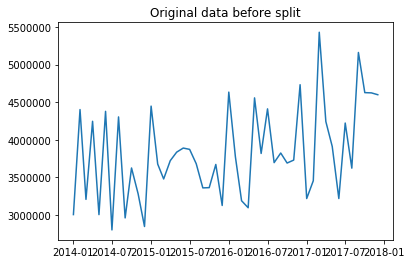

In [16]:
plt.plot(a.TimeIndex, a.Sales_Qty)
plt.title('Original data before split')
plt.show()

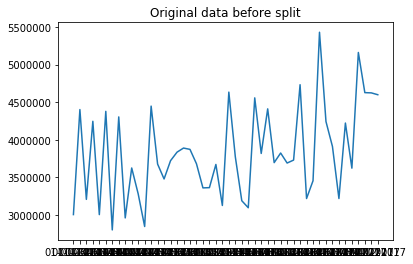

In [17]:
plt.plot(a.Month, a.Sales_Qty)
plt.title('Original data before split')
plt.show()

In [18]:
a.isnull().sum()

Month        0
Sales_Qty    0
TimeIndex    0
dtype: int64

In [19]:
train             = a[0:int(len(a)*0.7)] 
test              = a[int(len(a)*0.7):]

In [20]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing

In [21]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [22]:
model = SimpleExpSmoothing(np.asarray(train["Sales_Qty"]))

For alpha = 0.10,  RMSE is 786503.7586 MAPE is 15.03


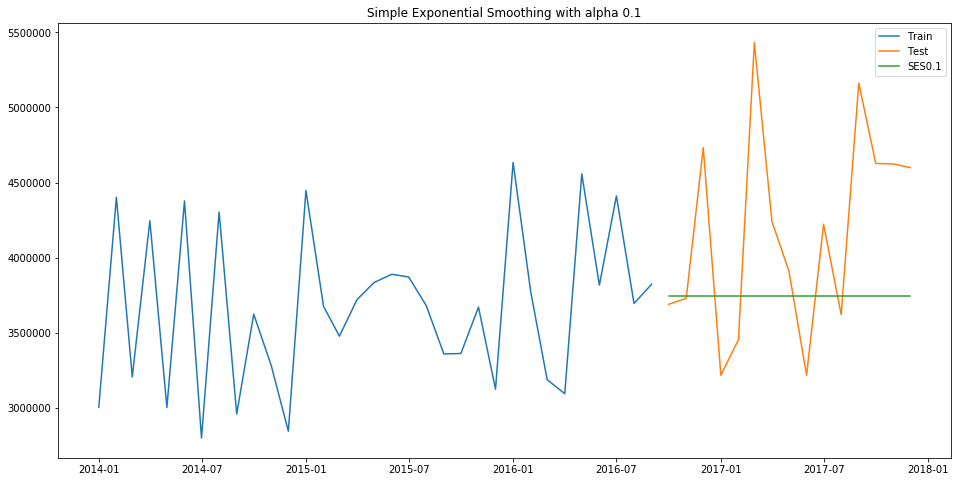

For alpha = 0.50,  RMSE is 726853.4234 MAPE is 14.43


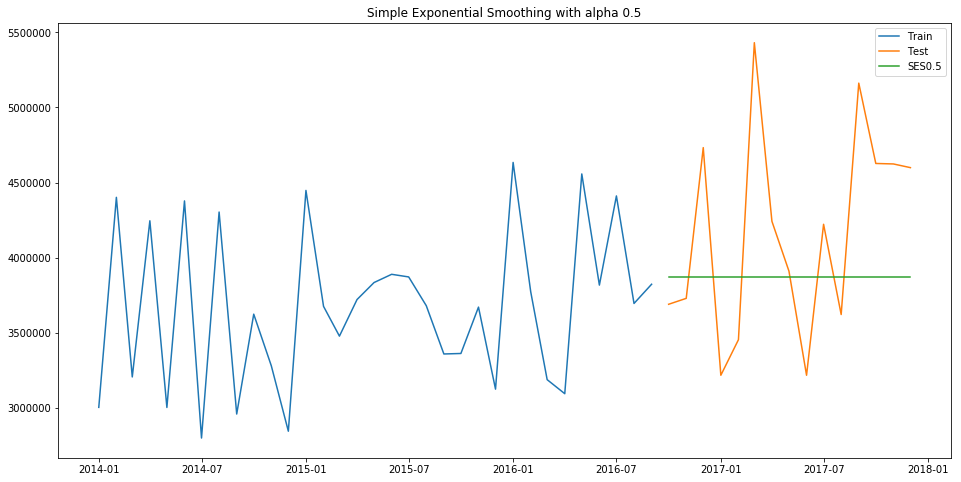

For alpha = 0.99,  RMSE is 748232.9936 MAPE is 14.66


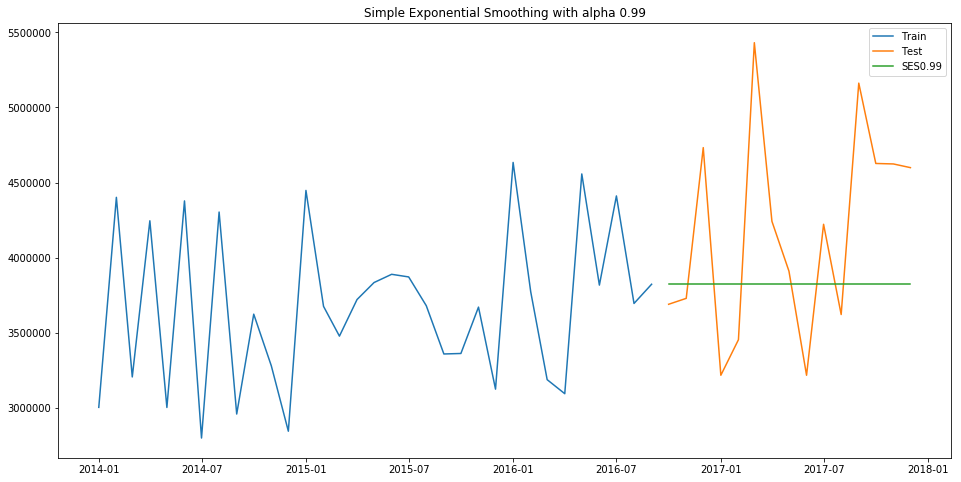

In [23]:
alpha_list = [0.1, 0.5, 0.99]

pred_SES  = test.copy() # Have a copy of the test dataset

for alpha_value in alpha_list:

    alpha_str            =  "SES" + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)
    pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Sales_Qty']))
    rmse                 =  np.sqrt(mean_squared_error(test['Sales_Qty'], pred_SES[alpha_str]))
    mape                 =  MAPE(test['Sales_Qty'],pred_SES[alpha_str])
###
    print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    plt.figure(figsize=(16,8))
    plt.plot(train.TimeIndex, train['Sales_Qty'], label ='Train')
    plt.plot(test.TimeIndex, test['Sales_Qty'], label  ='Test')
    plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
    plt.legend(loc='best') 
    plt.show()

In [24]:
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt, ExponentialSmoothing

In [25]:
pred1 = ExponentialSmoothing(np.asarray(a['Sales_Qty']), trend='additive', damped=False, seasonal='additive',
                                  seasonal_periods = 12).fit() #[:'2017-01-01']
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred1.params['smoothing_level'], 4)
print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', np.round(pred1.params['smoothing_slope'], 4))
print('Smoothing Seasonal: ', np.round(pred1.params['smoothing_seasonal'], 4))
print('Initial Level: ', np.round(pred1.params['initial_level'], 4))
print('Initial Slope: ', np.round(pred1.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(pred1.params['initial_seasons'], 4))
print('')

### Forecast for next 16 months




== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.0526
Smoothing Slope:  0.0526
Smoothing Seasonal:  0.8421
Initial Level:  3825194.25
Initial Slope:  14361.6736
Initial Seasons:  [ -822528.25   576358.75  -619915.25   420154.75  -823254.25   552571.75
 -1026851.25   478473.75  -867009.25  -201808.25  -546079.25  -981428.25]



In [26]:
y_pred1 =  pred1.forecast(steps = 15)
df_pred1 = pd.DataFrame({'Y_hat':y_pred1,'Y':test['Sales_Qty']})
print(df_pred1)

                   Y_hat        Y
2016-10-01  3.692622e+06  3689286
2016-11-01  3.841195e+06  3728654
2016-12-01  5.450952e+06  4732677
2017-01-01  4.359654e+06  3216483
2017-02-01  4.246200e+06  3453239
2017-03-01  3.606200e+06  5431651
2017-04-01  4.573506e+06  4241851
2017-05-01  3.989606e+06  3909887
2017-06-01  5.314393e+06  3216438
2017-07-01  4.795637e+06  4222005
2017-08-01  4.772563e+06  3621034
2017-09-01  5.021813e+06  5162201
2017-10-01  3.916738e+06  4627177
2017-11-01  4.065311e+06  4623945
2017-12-01  5.675068e+06  4599368


In [27]:
import itertools

In [28]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [29]:
q=a["Sales_Qty"]

In [30]:
log = np.log10(q)

In [31]:
train_log=np.log10(train['Sales_Qty'])

In [32]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [33]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

C:\Users\melam ropmay\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\melam ropmay\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\melam ropmay\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Best SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 model - AIC:-86.67310651384832


In [35]:
best_model = sm.tsa.statespace.SARIMAX(train_log,
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 0, 0, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

C:\Users\melam ropmay\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [36]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                          Sales_Qty   No. Observations:                   33
Model:             SARIMAX(1, 1, 1)x(1, 0, 0, 12)   Log Likelihood                  47.337
Date:                            Mon, 20 May 2019   AIC                            -86.673
Time:                                    15:56:29   BIC                            -80.810
Sample:                                01-01-2014   HQIC                           -84.730
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6047      0.156     -3.865      0.000      -0.911      -0.298
ma.L1         -0.8982      0.125   

In [41]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True, full_results=True)

In [42]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [43]:
pred99 = best_results.get_forecast(steps=24, alpha=0.1)

In [44]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [45]:
testCopy

,Month,Sales_Qty,TimeIndex,sales_ts_forecasted
2016-10-01,01-10-2016,3689286,2016-10-01,3.443123e+06
2016-11-01,01-11-2016,3728654,2016-11-01,3.852629e+06
2016-12-01,01-12-2016,4732677,2016-12-01,3.389932e+06
2017-01-01,01-01-2017,3216483,2017-01-01,4.319004e+06
2017-02-01,01-02-2017,3453239,2017-02-01,3.799244e+06
2017-03-01,01-03-2017,5431651,2017-03-01,3.488987e+06
2017-04-01,01-04-2017,4241851,2017-04-01,3.414220e+06
2017-05-01,01-05-2017,3909887,2017-05-01,4.246819e+06
2017-06-01,01-06-2017,3216438,2017-06-01,3.841415e+06
2017-07-01,01-07-2017,4222005,2017-07-01,4.167375e+06


In [47]:
# Compute the root mean square error
mse = ((testCopy['Sales_Qty'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 912998.488


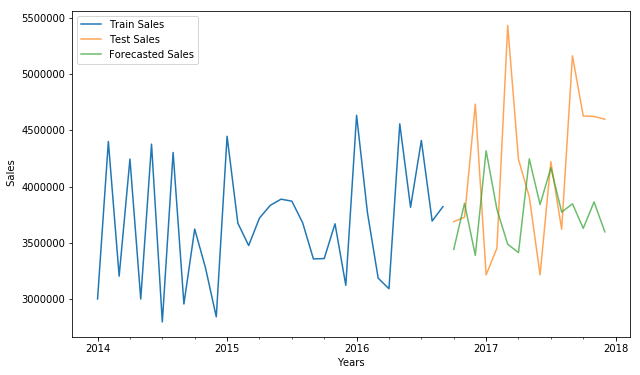

In [49]:
axis = train['Sales_Qty'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Sales_Qty'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel(' Sales')
plt.legend(loc='best')
plt.show()
plt.close()